PROJET 5 => Optimisez la gestion des données d'une boutique BottleNeck

Objectif pédagogique : 
Nettoyer et analsyer un jeu de données.
Réaliser une analyse **univariée**
Fusion plusieurs tables 
Gérer les erreurs et incohérences

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img

#Import les fichers Excel
df_erp = pd.read_excel('erp.xlsx', engine='openpyxl')
df_web = pd.read_excel('web.xlsx', engine='openpyxl')
df_liaison = pd.read_excel('liaison.xlsx', engine='openpyxl')

# POUR NE PAS AVOIR LE WARNING
import warnings
warnings.filterwarnings('ignore')


# Vérification des tables 

df_erp contient la liste des réferences produit avec leur prix et le nombre en stock

In [4]:
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


df_web contient la liste de réference avec le nombre de produit vendu depuis la mise en vente

In [6]:
df_web.head(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [7]:
#renommer la colonne Sku en Id_Web
df_web = df_web.rename(columns={'sku':'id_web'})

In [8]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

df_liaison contient le lien entre erp et web

In [9]:
df_liaison.head(5)

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [10]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [11]:
#Vérification du nombre du nombre de lignes dans chaque table
nb_erp = len(df_erp)
nb_web = len(df_web)
nb_liaison = len(df_liaison)

print('Le nombre de lignes ERP :', nb_erp, ', le nombre de lignes WEB :',
      nb_web, ', le nombre de lignes LIAISON :',nb_liaison,'.')


Le nombre de lignes ERP : 825 , le nombre de lignes WEB : 1513 , le nombre de lignes LIAISON : 825 .


# Nettoyage de la table df_liaison

Nous retrouvons bien toutes les données de la table erp ( qui correspond à la liste exhautive des produits en vente ) 
mais il y a dans la table liaison des valeurs id_web qui n'ont pas de données, ce qui correspond à des produits qui n'ont pas eu de ventes.

In [12]:
# Valeur avec NaN à retirer
df_liaison.loc[df_liaison['id_web'].isna()]

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


Retirer les valeurs null de la variable id_web => 91 valeurs sont avec une valeur NaN => isna.
 Il faut les retirer les id_web NaN car => il n'y a pas eu de vente ( 91 produits sans vente)

In [13]:
# Par consequences nous gardons seulement les produits qui ont une valeur Produit et vente ( id_web)
df_liaison = df_liaison.loc[df_liaison['id_web'].notna()]
df_liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


In [14]:
nb_liaison = len(df_liaison)

print('Le nombre de lignes LIAISON :',nb_liaison,'.')

Le nombre de lignes LIAISON : 734 .


# Nettoyage de la table df_web

Dans la table WEB tous est en doublons avec une ligne de chaque pour le post-type "product" et le type " attachement"
Pour le travail nous avons besoin seulement de la la partie "product"

In [15]:
# filtre sur web nan
df_web_nan = df_web.loc[df_web['id_web'].isna()]
nb_web_nan = len(df_web_nan)
print('Le nombre de lignes LIAISON AVEC NaN:',nb_web_nan,'.')

Le nombre de lignes LIAISON AVEC NaN: 85 .


In [16]:
# filtre sur product
df_web_product = df_web.loc[(df_web["post_type"] == "product") & (df_web['id_web'].notna())]
nb_web_product = len(df_web_product)

print('Le nombre de lignes web product sans les NAN :',nb_web_product,' ce qui equivant au nombre de produit avec une vente avec des enregistrements web.')


Le nombre de lignes web product sans les NAN : 714  ce qui equivant au nombre de produit avec une vente avec des enregistrements web.


- 85 NA
-714 product
- 714 attachement 
- = 1513 lignes au total

# Merge des tables

In [17]:
#On merge les df web avec liaison
df_erp = pd.merge(df_erp, df_liaison, how='inner', on='product_id')
df_erp


,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891
730,7025,1,69.0,2,instock,15887
731,7247,1,54.8,23,instock,13127-1
732,7329,0,26.5,14,instock,14680-1


In [18]:
#On merge les df web avec liaison
df_erp_web = pd.merge(df_erp, df_web_product, how='inner', on='id_web')
df_erp_web

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,0,0,0,0.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
710,7023,1,27.5,15,instock,15891,0,0,0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
711,7025,1,69.0,2,instock,15887,0,0,0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
712,7247,1,54.8,23,instock,13127-1,0,0,0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
# controle des doublons
df_erp_web.loc[df_erp_web['product_id'].duplicated(keep=False),:]
# ok pas de doublons

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


Dans la table des ventes si il n'y a pas de id web c'est qu'il n'y a pas eu de vente sur ce produit

# Erreur dans certains prix

## BOX PLOT

<AxesSubplot:xlabel='price'>

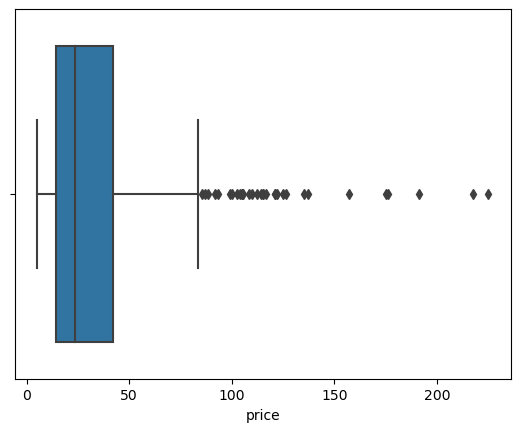

In [20]:
#Boite à moustache pour voir les outliers
sns.boxplot(x=df_erp_web["price"])

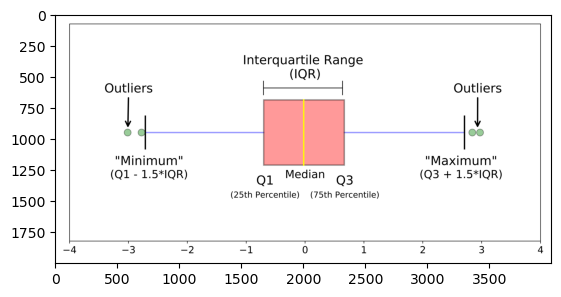

In [21]:
#Pour faciliter l'explication
image = img.imread('boxplot.png')
plt.imshow(image)
plt.show()

In [22]:
# Calcul des informations des quantiles outliers
q1 = df_erp_web["price"].quantile(0.25)
q3 = df_erp_web["price"].quantile(0.75)
mediane =  df_erp_web["price"].quantile(0.50)
IQR = q3-q1


In [23]:
print('La mediane est à ',mediane)

La mediane est à  23.55


In [24]:
print('Le Q1 est à',q1, ', le Q3 est à ',round(q3,1), ', le IQR est à ',round(IQR,2),".")

Le Q1 est à 14.1 , le Q3 est à  42.2 , le IQR est à  28.08 .


In [25]:
outliers_min = df_erp_web["price"][((df_erp_web["price"] < (q1-1.5*IQR)))]
min_outliers_min = outliers_min.min()
max_outliers_min = outliers_min.max()
nb_ouliers_min = len(outliers_min)

print('Le minimun des outliers est à', min_outliers_min, ', la valeur maximunm est de ',
      round(max_outliers_min, 2), 'et y a', round(nb_ouliers_min, 2),'valeurs.')

Le minimun des outliers est à nan , la valeur maximunm est de  nan et y a 0 valeurs.


In [26]:
# fonction de calculs des outliers
outliers_max = df_erp_web["price"][((df_erp_web["price"] > (q3+1.5*IQR)))]

min_outliers_max = outliers_max.min()
max_outliers_max = outliers_max.max()
nb_ouliers_max = len(outliers_max)

print('Le minimun des outliers est à', min_outliers_max, ', la valeur maximunm est de ',
      round(max_outliers_max, 2), 'et y a', round(nb_ouliers_max, 2),'valeurs.')

Le minimun des outliers est à 85.6 , la valeur maximunm est de  225.0 et y a 32 valeurs.


## Nuage de points Scatter

<AxesSubplot:xlabel='product_id', ylabel='price'>

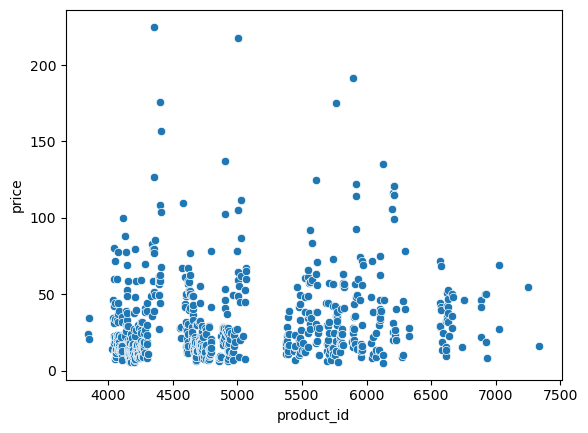

In [27]:
#Représentation visuelle supplémentaire
sns.scatterplot(data=df_erp_web, x="product_id", y="price")

## Liste des ref outlier

In [28]:
# filtre sur > à min_outliers
df_outlier = df_erp_web.loc[(df_erp_web["price"] >= 85.6),['product_id','post_name','price']]
df_outlier

,product_id,post_name,price
63,4115,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,100.0
65,4132,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,88.4
199,4352,champagne-egly-ouriet-grand-cru-millesime-2008,225.0
201,4355,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5
205,4359,champagne-larmandier-bernier-grand-cru-vieille...,85.6
218,4402,cognac-frapin-vip-xo,176.0
219,4404,cognac-frapin-fontpinot-xo,108.5
221,4406,cognac-frapin-chateau-de-fontpinot-1989-20-ans,157.0
222,4407,cognac-frapin-cigar-blend,104.0
227,4582,chateau-de-puligny-montrachet-1cru-champ-canet...,109.6


Il y a beaucoup de grand cru  / champagne / cognac => bouteilles qui coutent chères

In [29]:
# Pour le controle du nombre de valeur caluculé par la statistique IQR
nb_ouliers = len(df_outlier)
nb_ouliers

32

# Questions de LAURENT

## CA par produit

In [30]:
#Filtre visuel pour avoir juste les infos dont nous avons besoin
df_ca_produit =df_erp_web.copy()
df_ca_produit = df_ca_produit.loc[(df_ca_produit["total_sales"] >0),['product_id','price','total_sales']]

df_ca_produit['ca_product'] = df_ca_produit['price'] * df_ca_produit['total_sales']
df_ca_produit

,product_id,price,total_sales,ca_product
0,3847,24.2,6.0,145.2
3,4032,14.1,3.0,42.3
7,4042,31.2,7.0,218.4
8,4043,60.0,3.0,180.0
9,4045,42.6,14.0,596.4
...,...,...,...,...
698,6665,27.7,1.0,27.7
700,6738,15.4,3.0,46.2
707,6926,49.9,1.0,49.9
708,6928,19.0,2.0,38.0


## Total CA réalisé

In [31]:
ca_realise = df_ca_produit['ca_product'].sum()

print("Le total du chiffre d'affaires réalisé est de", ca_realise, '€')

Le total du chiffre d'affaires réalisé est de 70568.6 €


## Valeur du stock 

In [32]:
#Filtre visuel pour avoir juste les infos dont nous avons besoin
df_stock_produit =df_erp_web.copy()
df_stock_produit = df_stock_produit[['product_id','price','stock_quantity']]
df_stock_produit['stock_product'] = df_stock_produit['price'] * df_stock_produit['stock_quantity']
valeur_stock = df_stock_produit['stock_product'].sum()


print("Le valeur du stock est de", valeur_stock, '€')

Le valeur du stock est de 387837.6 €


In [33]:
pourc_stock = (valeur_stock/ca_realise)*100
pourc_stock

549.5894774729836